<a href="https://colab.research.google.com/github/phonhay103/tf2_protonx/blob/master/B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
cp '/content/drive/My Drive/Colab Notebooks/TF01/horse-or-human.zip' '.'

In [ ]:
!unzip -q 'horse-or-human.zip'

In [ ]:
train_folder = './horse-or-human/train'
valid_folder = './horse-or-human/validation'

**Build Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3)))

In [ ]:
model.add(MaxPooling2D(2, 2))

In [ ]:
model.add(Conv2D(32, (3, 3), activation='relu'))

In [ ]:
model.add(MaxPooling2D(2, 2))

In [ ]:
model.add(Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.add(MaxPooling2D(2, 2))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(512, activation='relu'))

In [ ]:
model.add(Dense(1, activation='sigmoid'))

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['acc'])

**Data Processing**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_generator = ImageDataGenerator(rescale=1/255)
valid_generator = ImageDataGenerator(rescale=1/255)

In [ ]:
generated_train_data = train_generator.flow_from_directory(
    train_folder,
    target_size=(300, 300),
    batch_size=128,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


In [ ]:
generated_valid_data = valid_generator.flow_from_directory(
    valid_folder,
    target_size=(300, 300),
    batch_size=128,
    class_mode='binary'
)

Found 256 images belonging to 2 classes.


**Train**

In [ ]:
history = model.fit_generator(
    generated_train_data,
    steps_per_epoch=8,
    epochs=15,
    verbose=1,
    validation_data=generated_valid_data,
    validation_steps=1
)

Epoch 1/15
8/8 [==============================] - 7s 830ms/step - loss: 7.0351 - acc: 0.5806 - val_loss: 0.5433 - val_acc: 0.7266
Epoch 2/15
8/8 [==============================] - 6s 766ms/step - loss: 0.6241 - acc: 0.6151 - val_loss: 0.9632 - val_acc: 0.5469
Epoch 3/15
8/8 [==============================] - 6s 769ms/step - loss: 0.4785 - acc: 0.7631 - val_loss: 2.1579 - val_acc: 0.4922
Epoch 4/15
8/8 [==============================] - 6s 770ms/step - loss: 0.1918 - acc: 0.9221 - val_loss: 1.0251 - val_acc: 0.7812
Epoch 5/15
8/8 [==============================] - 6s 778ms/step - loss: 0.3542 - acc: 0.8654 - val_loss: 0.8156 - val_acc: 0.7344
Epoch 6/15
8/8 [==============================] - 6s 779ms/step - loss: 0.1162 - acc: 0.9722 - val_loss: 0.7384 - val_acc: 0.7500
Epoch 7/15
8/8 [==============================] - 6s 778ms/step - loss: 0.8583 - acc: 0.8509 - val_loss: 0.8836 - val_acc: 0.8281
Epoch 8/15
8/8 [==============================] - 7s 853ms/step - loss: 0.2323 - acc: 0.90

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
    path = './' + fn
    img = image.load_img(path, target_size=(300, 300))
    x = image.img_to_array(img) / 255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])

    classes = model.predict(images, batch_size=10)
    print(classes)
    if classes[0] > 0.5:
        print(fn + ' is a human')
    else:
        print(fn + ' is a horse')

Saving 123499539_3031920083575323_4766032793052299728_o.jpg to 123499539_3031920083575323_4766032793052299728_o.jpg
[[3.354133e-12]]
123499539_3031920083575323_4766032793052299728_o.jpg is a horse


Saving 123546050_3031920096908655_5156056272761901946_o.jpg to 123546050_3031920096908655_5156056272761901946_o (1).jpg
(1, 300, 300, 3)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


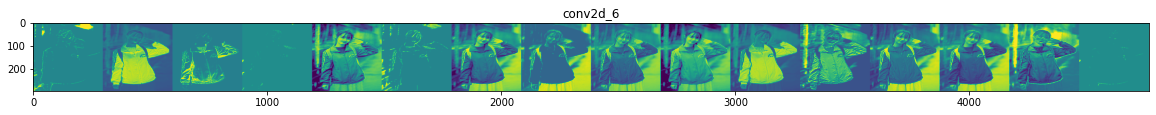

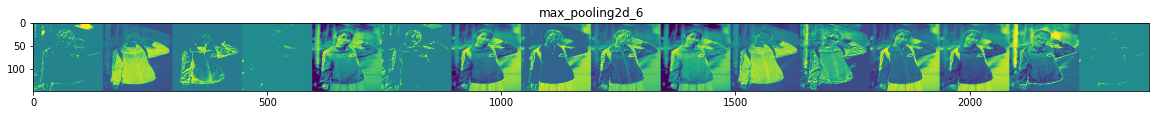

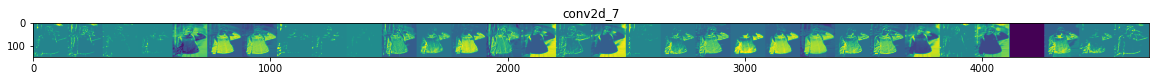

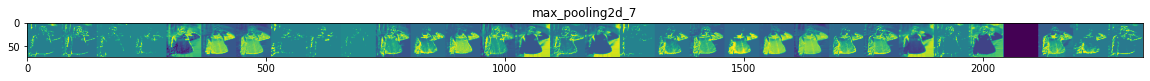

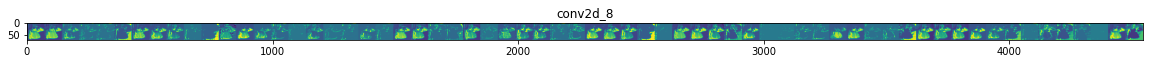

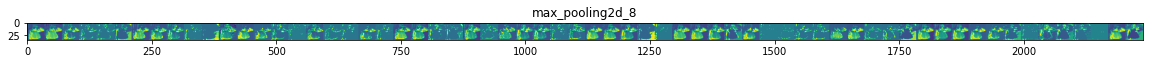

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
    path = './' + fn
    img = image.load_img(path, target_size=(300, 300))
    x = image.img_to_array(img) / 255
    x = x.reshape((1,) + x.shape)
    print(x.shape)

    visualization_model = tf.keras.models.Model(inputs = model.input, outputs = [layer.output for layer in model.layers])
    successive_feature_maps = visualization_model.predict(x)

    layer_names = [layer.name for layer in model.layers]

    for layer_name, feature_map in zip(layer_names, successive_feature_maps):
        if len(feature_map.shape) == 4:
            # feature_map: (1, size, size, n_features)
            n_features = feature_map.shape[-1]
            size = feature_map.shape[1]
            display_grid = np.zeros((size, size*n_features))

            for i in range(n_features):
                x = feature_map[0, :, :, i]
                x -= x.mean()
                x /= x.std()
                x *= 64
                x += 128
                x = np.clip(x, 0, 255).astype('uint8')
                display_grid[:, i*size : (i+1)*size] = x
            
            scale = 20. / n_features
            plt.figure(figsize=(scale*n_features, scale))
            plt.title(layer_name)
            plt.grid(False)
            plt.imshow(display_grid, aspect='auto', cmap='viridis')

